## Scikit Learn

### 선형 회귀를 scikit-learn 라이브러리로 구현

In [52]:
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

regr = linear_model.LinearRegression()

In [66]:
X = [[164], [179], [162], [170]]  # 다중회귀에도 사용하도록 함 
#X = np.array([[164], [179], [162], [170]])  
y = [53, 63, 55, 59]           # y = f(X)의 결과 

### 선형 회귀 학습결과 확인 및 예측

In [67]:
regr.fit(X, y)

LinearRegression()

In [68]:
coef = regr.coef_               # 직선의 기울기
intercept = regr.intercept_     # 직선의 절편
score = regr.score(X, y)        # 학습된 직선이 데이터를 얼마나 잘 따르나

print("y =", coef, "* X + ", intercept)
print("The score of this line for the data: ", score)

y = [0.55221745] * X +  -35.686695278969964
The score of this line for the data:  0.903203123105647


In [72]:
input_data = [[180], [185]]

### 선형회귀로 예측: 키와 몸무게의 상관관계

In [73]:
result = regr.predict(input_data)
print(result)

[63.71244635 66.47353362]


In [74]:
# 키가 169인 학생의 몸무게 예측
regr.predict([[169]])

array([57.63805436])

[54.8769671  63.1602289  53.77253219 58.19027182]


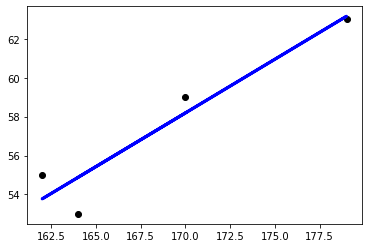

In [75]:
# 키와 몸무게의 상관관계를 그래프로 표현
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다
 
regr = linear_model.LinearRegression() 
 
X = [[164], [179], [162], [170]]  # 선형회귀의 입력은 2차원으로 만들어야 함
y = [53, 63, 55, 59]     # y = f(X)의 결과값
regr.fit(X, y)

# 학습 데이터와 y 값을 산포도로 그린다. 
plt.scatter(X, y, color='black')

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = regr.predict(X)
print(y_pred)

# 학습 데이터와 예측값으로 선그래프로 그린다. 
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

### LAB1 다차원 선형회귀

In [65]:
import numpy as np 
from sklearn import linear_model 
 
regr = linear_model.LinearRegression() 

# 남자는 0, 여자는 1
X = [[164, 1], [167, 1], [165, 0], [170, 0], [179, 0], [163, 1], [159, 0], [166, 1]]  # 입력데이터 2차원 
y = [43, 48, 47, 66, 67, 50, 52, 44]     # y 값은 1차원 데이터
regr.fit(X, y)          

print('계수 :', regr.coef_ )
print('절편 :', regr.intercept_)
print('점수 :', regr.score(X, y))
print('은지와 동민이의 추정 몸무게 :', regr.predict([[166, 1], [166, 0]]))

계수 : [ 0.88542825 -8.87235818]
절편 : -90.97330367074522
점수 : 0.7404546306026769
은지와 동민이의 추정 몸무게 : [47.13542825 56.00778643]


### 당뇨병 예제와 학습 데이터 생성

In [17]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn import datasets 
 
# 당뇨병 데이터 세트를 sklearn의 데이터집합으로부터 읽는다. 
diabetes = datasets.load_diabetes()

In [19]:
print('입력데이터의 특성들')
print(diabetes.feature_names)

입력데이터의 특성들
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [20]:
print('shape of diabetes.data: ', diabetes.data.shape)
print(diabetes.data)

shape of diabetes.data:  (442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [21]:
print('target data y:', diabetes.target.shape)
print(diabetes.target)

target data y: (442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91.

In [22]:
X = diabetes.data[:, 2]
print(X)

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215 -0.08380842  0.01750591
 -0.02884001 -0.00189471 -0.02560657 -0.01806189  0.04229559  0.01211685
 -0.0105172  -0.01806189 -0.05686312 -0.02237314 -0.00405033  0.06061839
  0.03582872 -0.01267283 -0.07734155  0.05954058 -0.02129532 -0.00620595
  0.04445121 -0.06548562  0.12528712 -0.05039625 -0.06332999 -0.03099563
  0.02289497  0.01103904  0.07139652  0.01427248 -0.00836158 -0.06764124
 -0.0105172  -0.02345095  0.06816308 -0.03530688 -0.01159501 -0.0730303
 -0.04177375  0.01427248 -0.00728377  0.0164281  -0.00943939 -0.01590626
  0.0250506  -0.04931844  0.04121778 -0.06332999 -0.06440781 -0.02560657
 -0.00405033  0.00457217 -0.00728377 -0.0374625  -0.02560657 -0.02452876
 -0.01806189 -0.01482845 -0.02991782 -0.046085   -0.06979687  0.03367309
 -0.00405033 -0.02021751  0.00241654 -0.03099563  0.02828403 -0.03638469
 -0.05794093 -0.0374625   0.01211685 -0.02237314 -0.

In [23]:
X = diabetes.data[:, np.newaxis, 2]
print(X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [24]:
# newaxis를 이용한 배열의 차원 증가
A = np.array([1, 2, 3])
print(A)
print(A.shape)

B = A[:, np.newaxis]
print(B)
print(B.shape)

C = A[np.newaxis, :]
print(C)
print(C.shape)

[1 2 3]
(3,)
[[1]
 [2]
 [3]]
(3, 1)
[[1 2 3]]
(1, 3)


### 체질량지수bmi와 당뇨수치의 상관관계

In [27]:
regr.fit(X, diabetes.target)         # 학습을 통한 선형회귀 모델을 생성 
print(regr.coef_, regr.intercept_)

[949.43526038] 152.1334841628967


In [33]:
# 학습 데이터와 테스트 데이터를 분리한다. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

In [34]:
# 학습 데이터와 테스트 데이터를 분리한다. (BMI 열만 학습에 사용하는 경우) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data[:,np.newaxis,2],
                                                    diabetes.target,
                                                    test_size=0.2) 
regr = LinearRegression() 
regr.fit(X_train, y_train)

LinearRegression()

In [36]:
score = regr.score(X_train, y_train)
print(score)
score = regr.score(X_test, y_test)
print(score)

0.36276224407332525
0.2524987688508582


### 당뇨병 예제의 학습 및 테스트 데이터 구분

In [37]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size=0.2)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)     # 테스트 데이터로 예측해보자.

In [38]:
score = regr.score(X_train, y_train)
print(score)
score = regr.score(X_test, y_test)
print(score)

0.5481338549209913
0.38566928295869407


In [39]:
print(y_pred)
print(y_test)

[ 87.55000025  62.75554366 187.46890725 125.02737736  90.51068387
 166.79728528  66.96708033 159.70264827 180.88999658 214.13751564
 175.20533128 155.95545679 144.32016421 149.10795103 165.09883543
  63.84005288  77.1681792  196.95768334 197.77247494 214.28452926
 119.90536919 238.96556743 124.22928175 224.25273306 100.47096289
  83.28524393  62.28328525 178.75848325 189.77726235  34.69139621
  99.43492119 264.50209814 183.9558158  188.64291152  70.77644978
  95.12000916 147.18795909  83.97658469 171.62373077 125.54852696
 255.7582695  118.31621305 239.10881863 197.83070891 156.54105547
 222.54651618 188.59184141 164.84250191 165.19279644 126.44248889
 207.71469265 175.17657769 211.68475747 140.95819647 152.08797768
 177.96583555 110.41341292 116.91977943 165.40288615  62.06525289
 142.23175696  94.54428432 109.34098024  89.2319419  117.65918022
 154.66888517 146.90470453  82.59971769 116.07403829 150.74362333
 109.05146913 157.67934341 147.93193151 187.03042293 203.80594259
  96.31054

### LAB 1 데이터 80%로 학습하여 예측한 결과와 실제 데이터 비교

[  10.81475024 -257.49239207  523.13906058  310.25868257 -177.79392873
   19.90160555 -161.00044838   84.80617997  489.33025448   90.79683335] 151.8766162783113


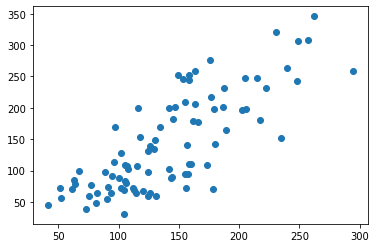

In [82]:
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다
from sklearn import datasets
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error

regr = linear_model.LinearRegression() 

# 학습 데이터와 테스트 데이터를 분리한다. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2) 
regr.fit(X_train, y_train)
print(regr.coef_, regr.intercept_)

y_pred = regr.predict(X_test)

plt.scatter(y_pred, y_test)
plt.show()

#print('Mean squared error:', mean_squared_error(y_test, y_pred))

### 알고리즘이 갖는 오차

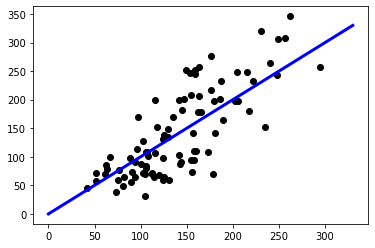

In [83]:
plt.scatter(y_pred, y_test,  color='black')

x = np.linspace(0, 330, 100)  # 특정 구간의 점 
plt.plot(x, x, linewidth = 3, color = 'blue')
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error

... # 이전 절에서 구한 선형회귀 모델의 코드를 삽입함

print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 2316.0105598355894


### 붓꽃 분류

In [85]:
from sklearn.datasets import load_iris 
iris = load_iris() 
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [86]:
iris.data.shape

(150, 4)

### Iris 데이터 분석

In [87]:
print(iris.feature_names) # 4개의 특징 이름을 출력한다.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [88]:
# 정수는 꽃의 종류를 나타낸다.: 0 = setosa, 1=versicolor, 2=virginica 
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### k-NN 알고리즘 적용

In [97]:
# (80:20)으로 분할한다. 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 

iris = load_iris() 
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

In [98]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

num_neigh = 5
knn = KNeighborsClassifier(n_neighbors = num_neigh) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
scores = metrics.accuracy_score(y_test, y_pred) 
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(num_neigh, scores))

n_neighbors가 5일때 정확도: 0.900


### 새로운 꽃으로 모델을 통한 분류

In [104]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
 
iris = load_iris() 
knn = KNeighborsClassifier(n_neighbors = num_neigh) 
#knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(iris.data, iris.target) 

KNeighborsClassifier()

In [105]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'} 
 
# 아직 보지 못한 새로운 데이터를 제시해보자. 
X = [[3,4,5,2], [5,4,2,2]] 
y = knn.predict(X) 
 
print(classes[y[0]]) 
print(classes[y[1]]) 

versicolor
setosa


In [107]:
y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)
print('n_neighbors가 {0:d}일 때 정확도: {1:.3f}'.format(num_neigh, scores))

n_neighbors가 5일 때 정확도: 0.967


(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  2., 48.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7f6a10c9e5d0>)

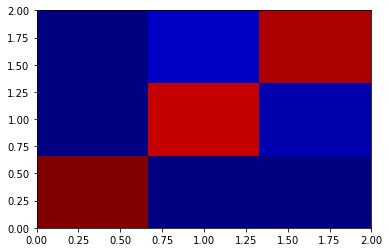

In [109]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)
#plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.gray)

In [110]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(iris.target, y_pred_all)
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

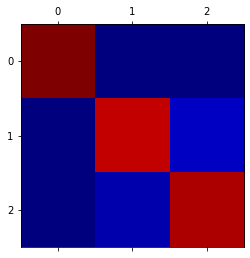

In [112]:
#plt.matshow(conf_mat)
plt.matshow(conf_mat, cmap=plt.cm.jet)

### 기대 수명 예측

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [114]:
import pandas as pd
import seaborn as sns

In [123]:
life = pd.read_csv("/content/drive/MyDrive/강의5 파이썬과데이터과학/코드1/life_expectancy.csv")
print(life.head())
print(life.shape)
print(life.dtypes)

       Country  Year      Status  Life expectancy  Adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria   HIV/AIDS         GDP  Population  \
0    6.0            

In [124]:
life = life[['Life expectancy', 'Year', 'Alcohol', 
             'Percentage expenditure', 'Total expenditure', 
             'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP', 
             'Thinness 1-19 years', 'Thinness 5-9 years']]
print(life)

      Life expectancy  Year  Alcohol  Percentage expenditure  \
0                65.0  2015     0.01               71.279624   
1                59.9  2014     0.01               73.523582   
2                59.9  2013     0.01               73.219243   
3                59.5  2012     0.01               78.184215   
4                59.2  2011     0.01                7.097109   
...               ...   ...      ...                     ...   
2933             44.3  2004     4.36                0.000000   
2934             44.5  2003     4.06                0.000000   
2935             44.8  2002     4.43                0.000000   
2936             45.3  2001     1.72                0.000000   
2937             46.0  2000     1.68                0.000000   

      Total expenditure  Hepatitis B  Measles  Polio   BMI         GDP  \
0                  8.16         65.0     1154    6.0  19.1  584.259210   
1                  8.18         62.0      492   58.0  18.6  612.696514   
2        

In [126]:
print(life.shape)
print(life.isnull().sum())

(2938, 12)
Life expectancy            10
Year                        0
Alcohol                   194
Percentage expenditure      0
Total expenditure         226
Hepatitis B               553
Measles                     0
Polio                      19
BMI                        34
GDP                       448
Thinness 1-19 years        34
Thinness 5-9 years         34
dtype: int64


In [127]:
life.dropna(inplace = True)
print(life.shape)

(1853, 12)


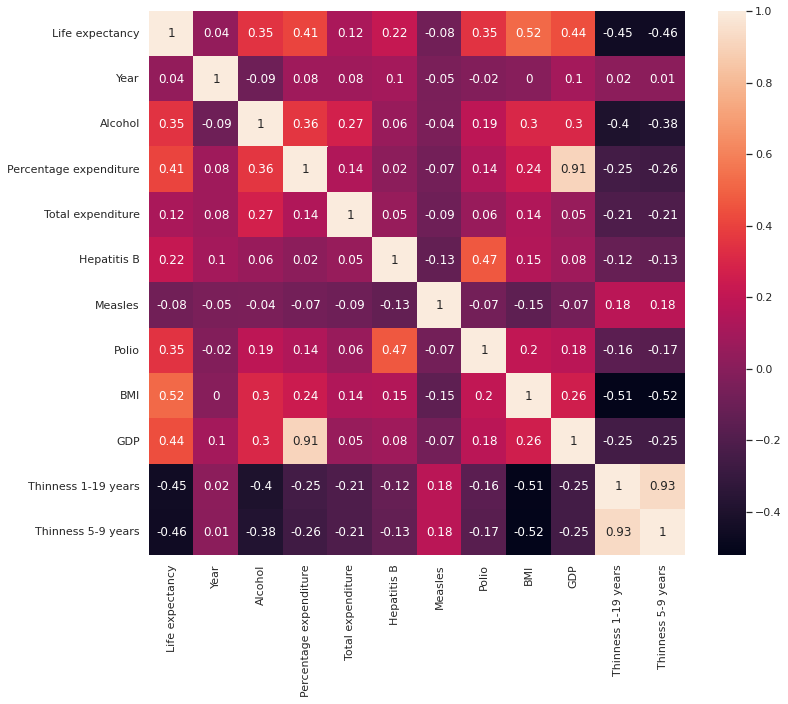

In [128]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,10)}) 
correlation_matrix = life.corr().round(2) 
sns.heatmap(data=correlation_matrix, annot=True) 
plt.show()

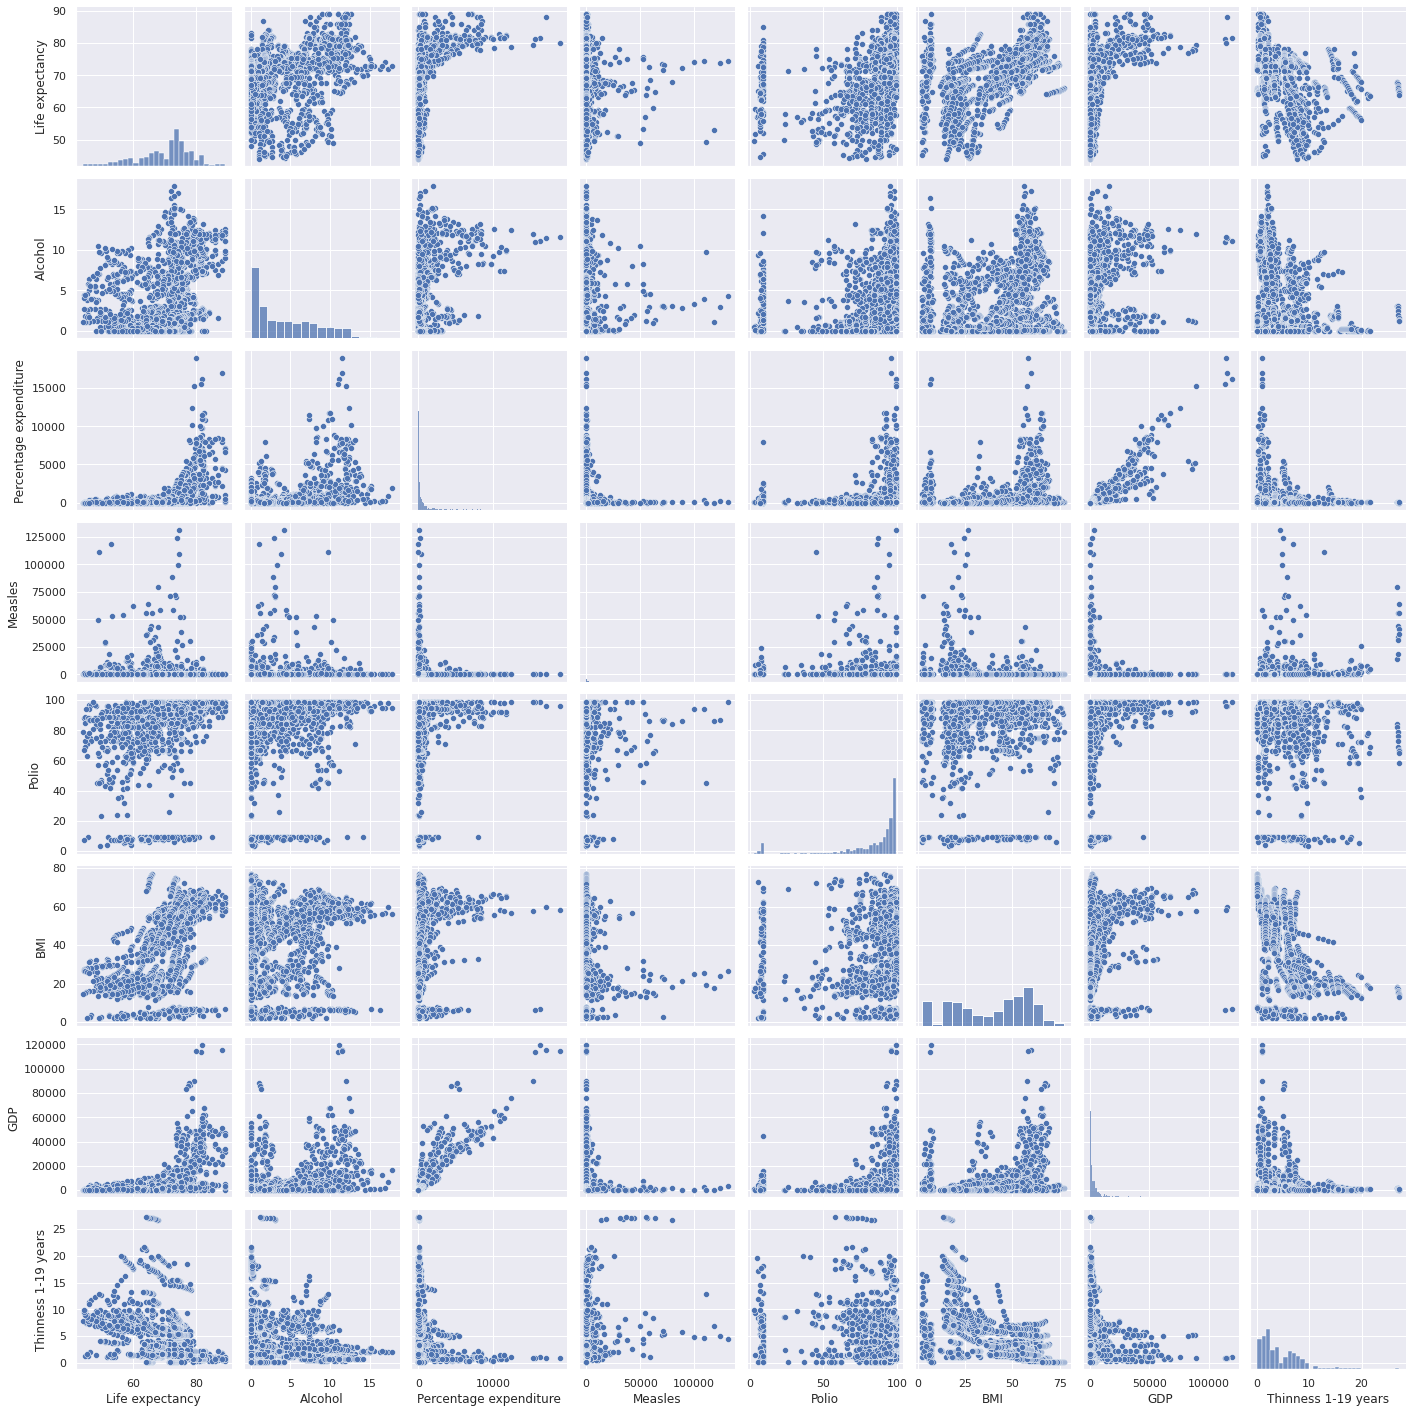

In [129]:
sns.pairplot(life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 
             'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']])
plt.show()

In [130]:
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [131]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [132]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 

lin_model = LinearRegression() 
lin_model.fit(X_train, y_train)
y_test_predict = lin_model.predict(X_test)

In [133]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE =', rmse)

RMSE = 6.848899992590041


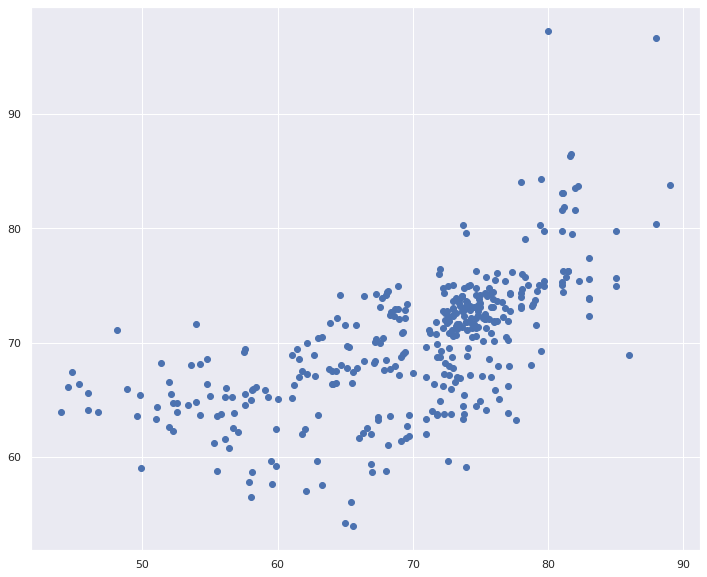

In [134]:
plt.scatter(y_test, y_test_predict)
plt.show()

### 보스턴 집값 데이터 읽고 결측 확인

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함
 
from sklearn.datasets import load_boston 
boston = load_boston() 
 
df = pd.DataFrame(boston.data, columns=boston.feature_names) 
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
df['MEDV'] = boston.target 

In [ ]:
print( df.isnull().sum() )

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### 각 특징들 사이의 상관관계

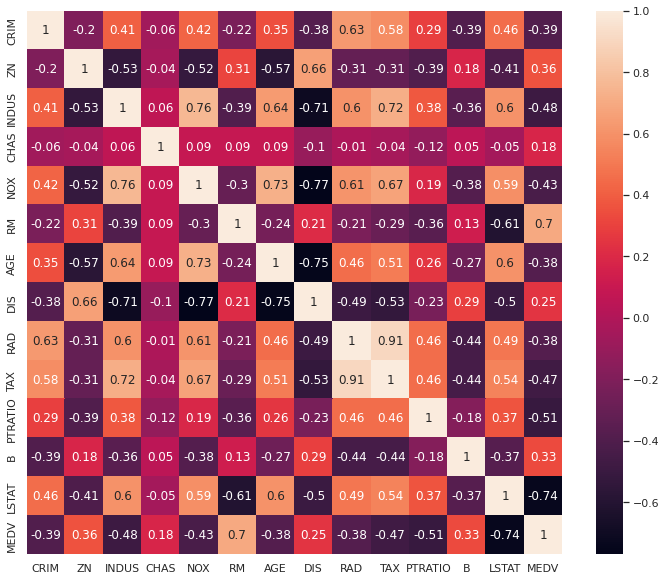

In [ ]:
sns.set(rc={'figure.figsize':(12,10)}) 
correlation_matrix = df.corr().round(2) 
sns.heatmap(data=correlation_matrix, annot=True) 
plt.show()

### 어떤 특징들이 서로 상관관계가 있을까?

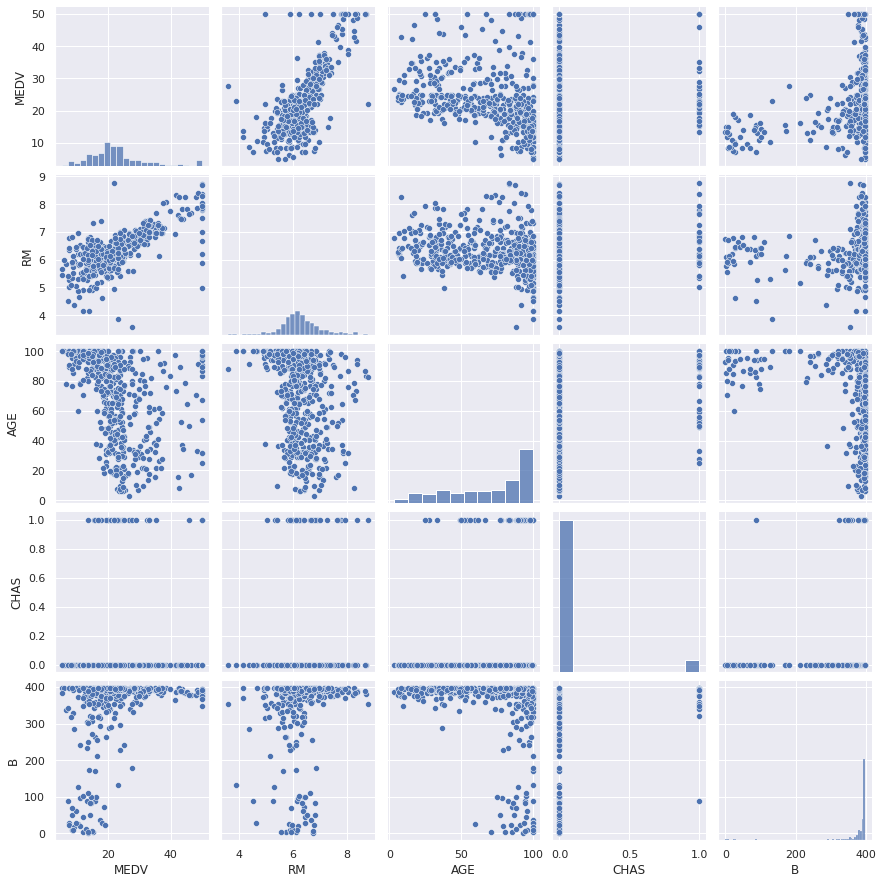

In [ ]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS", "B"]])
plt.show()

### 간단한 회귀모델

In [ ]:
X = df[['LSTAT', 'RM']] 
y = df['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 

lin_model = LinearRegression() 
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_test_predict = lin_model.predict(X_test) 
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE =', rmse)

RMSE = 5.27447016521602
